In [3]:
using PGFPlots
using CSV

INFO: Recompiling stale cache file /mnt/c/Users/Maxime/wsl/.julia/lib/v0.6/CSV.ji for module CSV.


In [12]:
rl = CSV.read("lognm15_avgr.csv")
rl_vals = convert(Vector{Float64}, rl[:Value])
rl_steps = convert(Vector{Float64}, rl[:Step])
safe_rl = CSV.read("log2_avgr.csv")
safe_rl_vals = convert(Vector{Float64}, safe_rl[:Value])
safe_rl_steps = convert(Vector{Float64}, safe_rl[:Step]);

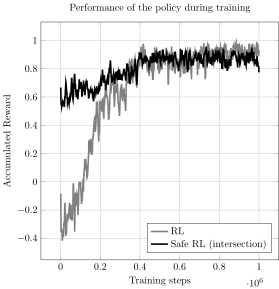

In [31]:
ax = Axis(style="width=10cm, height=10cm, grid=both")
p1 = PGFPlots.Linear(rl_steps, rl_vals, legendentry="RL", mark="none", style="ultra thick, gray")
push!(ax, p1)
p2 = PGFPlots.Linear(safe_rl_steps, safe_rl_vals, legendentry="Safe RL (intersection)", mark="none", style="ultra thick, black")
push!(ax, p2)
ax.legendPos="south east"
ax.xlabel = "Training steps"
ax.ylabel = "Accumulated Reward"
ax.title = "Performance of the policy during training"
# add grid
# black and gray
# no marker
# label axis
# save("training.tex", ax)
ax

In [82]:
safe_rl_time = [24.01, 24.64, 26.92, 28.477, 29.28]
# rl_time = [21.94, 24.46, 26.34, 42.38, 59.243]
# rl_crash = [9.17, 11.33, 7.65, 7.8, 9.57]
rl_time = [15.87, 17.301, 20.82, 19.7, 18.55, 20.42, 17.25, 17.26, 21.4, 16.6, 22.02, 19.9, 22.13, 14.44]
rl_crash = [2.010, 1.390, 1.46, 2.71, 3.35, 1.72, 1.7, 1., 1.25, 2.8, 1.04, 2.8, 0.96, 4.84];

rl_time_par = [14.44, 15.87, 17.25, 22.13, 96]
rl_crash_par = [4.84, 2.010, 1., 0.96, 0.01];

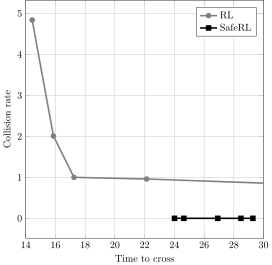

In [83]:
p = sortperm(rl_time)
rl_time = rl_time[p]
rl_crash = rl_crash[p]
safe_rl_time = sort(safe_rl_time)

ax = Axis(style="width=10cm, height=10cm, grid=both")
# p1 = Plots.Scatter(rl_time, rl_crash, legendentry="RL", style="ultra thick, gray, mark=*, mark options={gray},")
# push!(ax, p1)
p1 = Plots.Linear(rl_time_par, rl_crash_par, legendentry="RL", style="ultra thick, gray, mark=*, mark options={gray}")
push!(ax, p1)
p2 = Plots.Linear(safe_rl_time, zeros(length(safe_rl_time)), legendentry="SafeRL", style="ultra thick, black, mark=square*, mark options={black}")
push!(ax, p2)


ax.legendPos="north east"
ax.xlabel = "Time to cross"
ax.ylabel = "Collision rate"
ax.xmin= 14
ax.xmax=30
# ax.title = "Pareto frontier"
save("pareto.tex", ax)
ax